In [22]:
#importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow import keras

In [7]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [8]:
import keras as k

In [9]:
print(f"TensorFlow {tf.__version__}")
print(f"Keras {k.__version__}")

TensorFlow 2.15.0
Keras 2.15.0


## Creating a simple classifier using keras on MNIST data

In [10]:
mnist = tf.keras.datasets.mnist

In [11]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [12]:
(X_train_full,y_train_full), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
X_train_full.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
#create a validataion data from the full training data
#scale the data between 0 to 1 by dividing it by 255, as its an unsigned data between 0-255 range
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

#scale the test set as well
X_test = X_test/255.

In [19]:
#train: 55000
#test: 10000
#validation: 5000

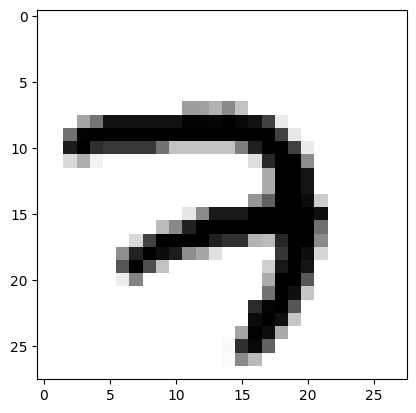

In [20]:
#Viewing some data
plt.imshow(X_train[0],cmap="binary")
plt.show()

<Axes: >

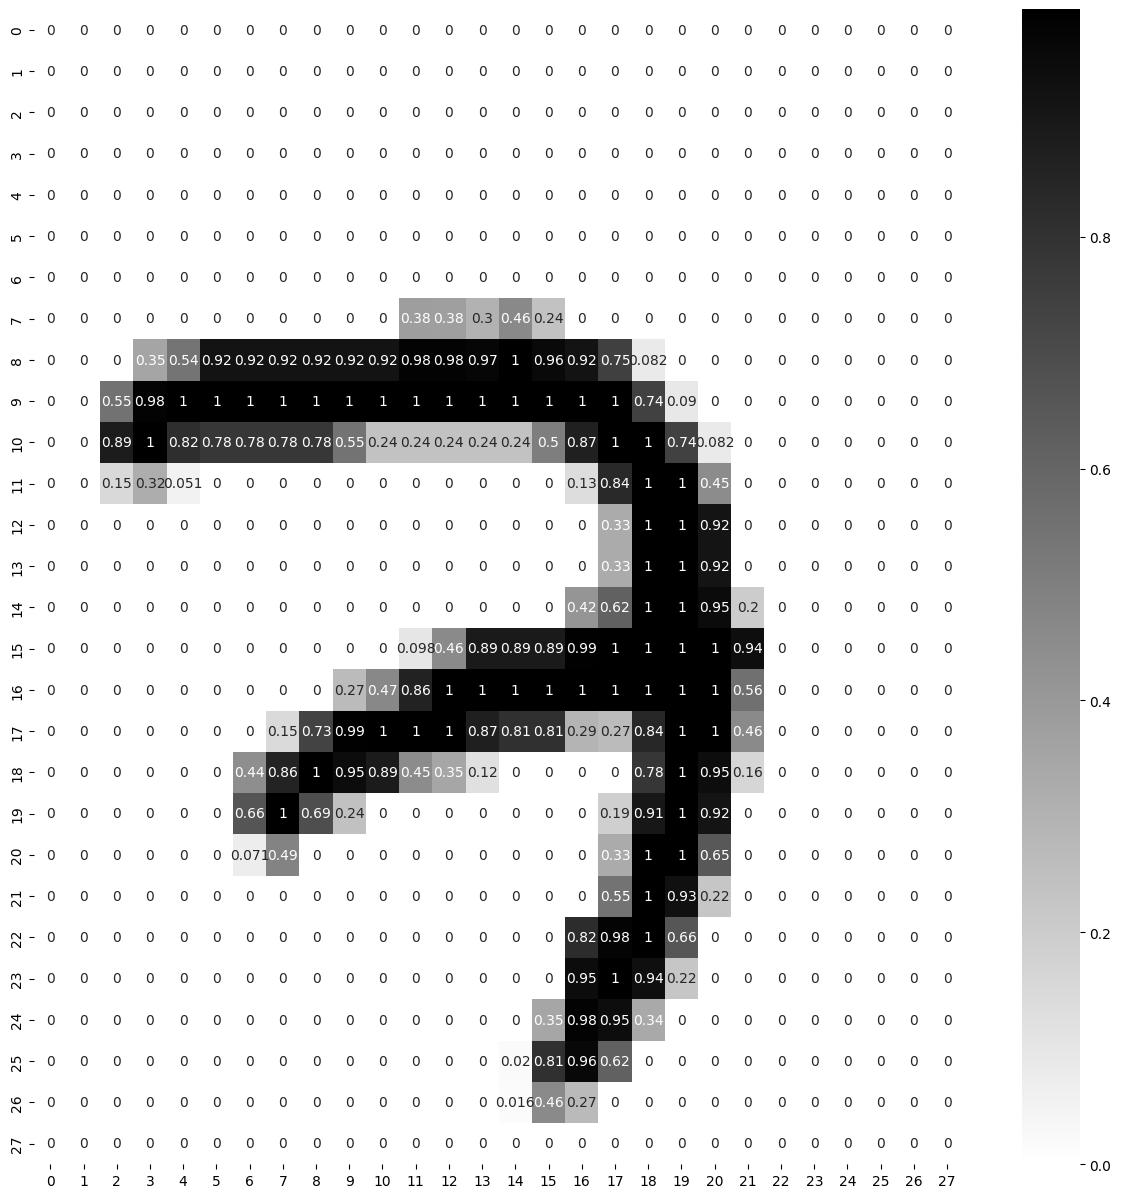

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

## Architecture used

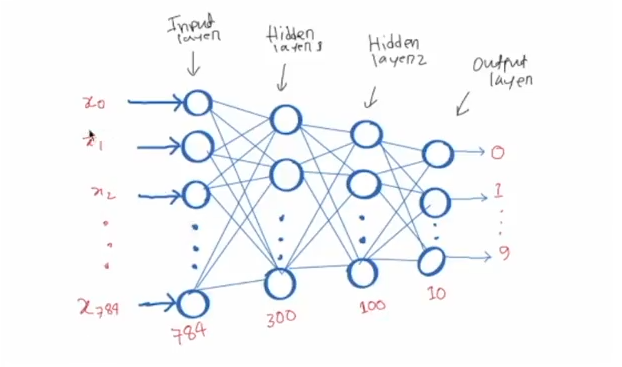




1.   we have an image of size 28x28 firstly we will flatten the image and hence we will get 784 unique features
2.   means we will have total of 784 neurons



In [25]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)


In [26]:
model_clf.layers

In [27]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#total parameters to be trained
sum((235500,30100,1010))

266610

In [29]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [30]:
hidden1.get_weights()[0].shape

(784, 300)

In [31]:
hidden1.get_weights()[1].shape

(300,)

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights.shape

(784, 300)

In [34]:
biases.shape

(300,)

In [35]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [36]:
EPOCHS = 30
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6095 - accuracy: 0.8408 - val_loss: 0.3044 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2873 - accuracy: 0.9182 - val_loss: 0.2428 - val_accuracy: 0.9340
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2342 - accuracy: 0.9331 - val_loss: 0.1992 - val_accuracy: 0.9462
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1984 - accuracy: 0.9444 - val_loss: 0.1738 - val_accuracy: 0.9540
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1717 - accuracy: 0.9514 - val_loss: 0.1569 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1510 - accuracy: 0.9570 - val_loss: 0.1419 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1353 - accuracy: 0.9621 - val_loss: 0.1311 - val_accuracy

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.609523,0.840764,0.304363,0.9184
1,0.287265,0.918218,0.242806,0.9340
2,0.234178,0.933091,0.199151,0.9462
3,0.198417,0.944400,0.173751,0.9540
4,0.171699,0.951364,0.156931,0.9580
5,0.151042,0.957018,0.141862,0.9612
6,0.135279,0.962145,0.131115,0.9670
7,0.122206,0.965182,0.120790,0.9668
8,0.110638,0.969364,0.115954,0.9688
9,0.101215,0.972327,0.106552,0.9686


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='val_loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

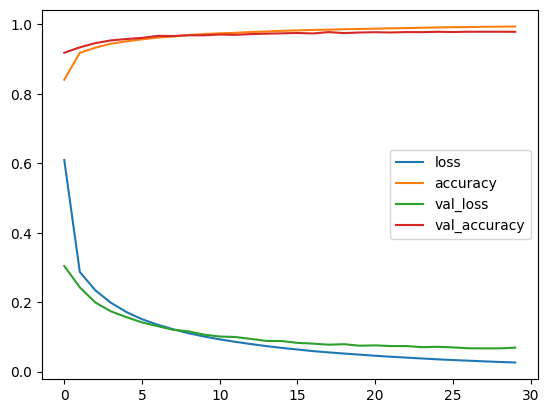

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0708 - accuracy: 0.9781


[0.07077206671237946, 0.9781000018119812]

# Sample Check-Test data

In [41]:
x_new=X_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [42]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

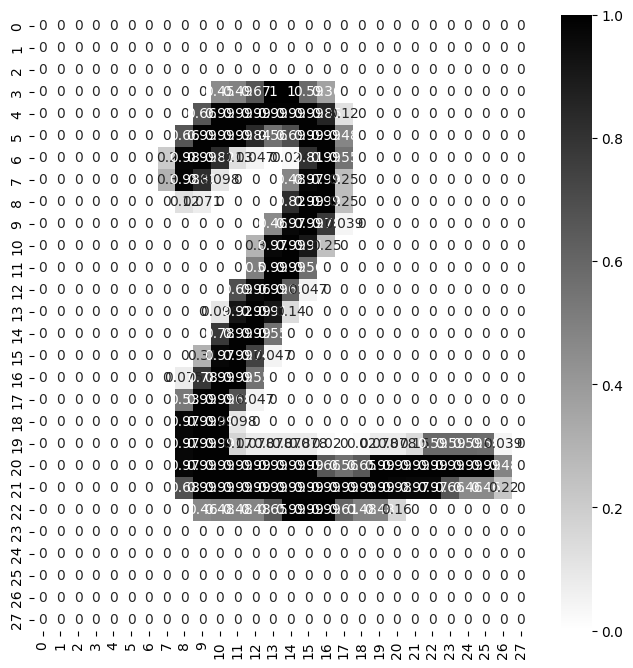

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[1],annot = True,cmap="binary")

In [45]:
y_prob = model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 277ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
y_prob

array([[3.8442904e-06, 6.8953682e-08, 1.3858564e-05, 4.8116297e-05,
        1.1268752e-08, 9.8649355e-07, 1.5063967e-11, 9.9992669e-01,
        6.8149996e-07, 5.6751246e-06],
       [1.0404236e-05, 1.8356426e-04, 9.9972969e-01, 1.5731697e-05,
        5.2733484e-10, 9.2266339e-07, 9.9119161e-06, 8.2945976e-12,
        4.9766797e-05, 8.4602364e-10],
       [7.9944393e-06, 9.9772578e-01, 1.9091780e-04, 2.1210153e-05,
        2.2577844e-04, 1.3322974e-04, 6.4738568e-05, 1.1342210e-03,
        4.8698430e-04, 9.0881085e-06]], dtype=float32)

In [47]:
y_pred = np.argmax(y_prob,axis=-1)


In [48]:
y_pred

array([7, 2, 1])

In [49]:
actual

array([7, 2, 1], dtype=uint8)

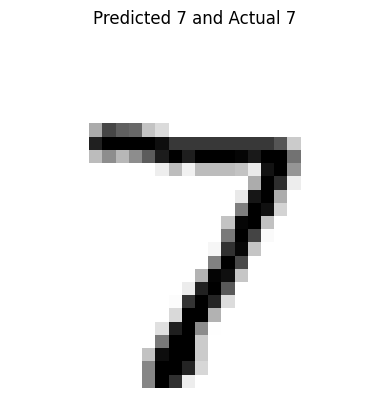

***************************************************


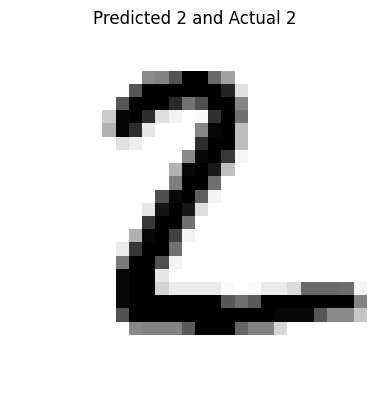

***************************************************


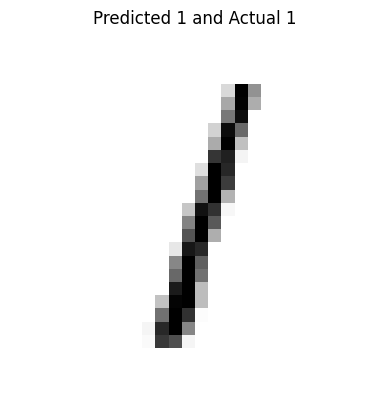

***************************************************


In [52]:
#plot
for data,pred,actual_data in zip(x_new,y_pred,actual):
  plt.imshow(data,cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("***************************************************")